In [31]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [65]:
print(chooser.selected_path)
print(chooser.selected)
folder_path=chooser.selected_path
file=chooser.selected

/Users/Joseph/Desktop/VPS35
/Users/Joseph/Desktop/VPS35/baseline_output.csv


In [33]:
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)
print(bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [66]:
data=pd.read_csv(file, index_col=0)
print(data)

       time_bin  worm  plate_id      date        time     speed          x  \
0           4.0   109    140510  20230331    3.694429  0.339114  22.288600   
1           4.0   142    130455  20230331    3.878000  0.150650  19.365950   
2           4.0   188    111617  20220609    3.841333  0.330067  22.111100   
3           4.0   270    135619  20220609    3.785857  0.228814  30.055129   
4           4.0   452    125942  20220818    3.764400  0.289060  17.738580   
...         ...   ...       ...       ...         ...       ...        ...   
34533     420.0   214    124222  20220818  419.514417  0.063650  17.577158   
34534     420.0   217    124222  20220818  419.514417  0.052025  25.911225   
34535     420.0   218    124222  20220818  419.514417  0.138300  27.547775   
34536     420.0   228    124222  20220818  419.514417  0.137642   8.295908   
34537     420.0   233    124222  20220818  419.514417  0.144642  26.647400   

               y  angularspeed  pathlength        kink      bia

In [67]:
print(data.Strain.unique())

['N2_OffFood' 'N2_OnFood' 'cat-2(e1112)_OffFood' 'cat-2(e1112)_OnFood'
 'cat-2(n4547)_OffFood' 'cat-2(n4547)_OnFood' 'vps-35(hu68)_OffFood'
 'vps-35(hu68)_OnFood' 'vps-35(ok1880)_OffFood' 'vps-35(ok1880)_OnFood']


In [68]:
vps_data=data[data['Strain'].isin(['N2_OffFood', 'N2_OnFood',
                          'vps-35(hu68)_OffFood','vps-35(hu68)_OnFood',
                          'vps-35(ok1880)_OffFood','vps-35(ok1880)_OnFood',
                                  'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood',
                                  'cat-2(n4547)_OffFood', 'cat-2(n4547)_OnFood'])]
print(vps_data)

       time_bin  worm  plate_id      date        time     speed          x  \
0           4.0   109    140510  20230331    3.694429  0.339114  22.288600   
1           4.0   142    130455  20230331    3.878000  0.150650  19.365950   
2           4.0   188    111617  20220609    3.841333  0.330067  22.111100   
3           4.0   270    135619  20220609    3.785857  0.228814  30.055129   
4           4.0   452    125942  20220818    3.764400  0.289060  17.738580   
...         ...   ...       ...       ...         ...       ...        ...   
34533     420.0   214    124222  20220818  419.514417  0.063650  17.577158   
34534     420.0   217    124222  20220818  419.514417  0.052025  25.911225   
34535     420.0   218    124222  20220818  419.514417  0.138300  27.547775   
34536     420.0   228    124222  20220818  419.514417  0.137642   8.295908   
34537     420.0   233    124222  20220818  419.514417  0.144642  26.647400   

               y  angularspeed  pathlength        kink      bia

In [69]:
start = 150 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata = vps_data[(vps_data["time"] >= start) & (vps_data["time"] <= point)]
# chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
#dataFrame[(dataFrame['Salary']>=100000) & (dataFrame['Age']<40)]
print(chunkeddata)

       time_bin  worm  plate_id      date        time     speed          x  \
32159     151.0     2    135724  20230331  150.487833  0.056625  20.112262   
32160     151.0     4    135724  20230331  150.487833  0.082817  16.891983   
32161     151.0     5    135724  20230331  150.503391  0.074648  14.800826   
32162     151.0     7    135724  20230331  150.487833  0.089546  30.990975   
32163     151.0    12    135724  20230331  150.487833  0.105833  18.204617   
...         ...   ...       ...       ...         ...       ...        ...   
33104     400.0   217    124222  20220818  399.513917  0.036633  25.885783   
33105     400.0   218    124222  20220818  399.513917  0.099050  28.994517   
33106     400.0   228    124222  20220818  399.513917  0.107317   6.161408   
33107     400.0   231    124222  20220818  399.513917  0.106717  24.862308   
33108     400.0   233    124222  20220818  399.513917  0.130042  25.717675   

               y  angularspeed  pathlength        kink      bia

In [70]:
chunkeddata["Speed/BL"]=chunkeddata.speed/chunkeddata.midline
print(chunkeddata)

       time_bin  worm  plate_id      date        time     speed          x  \
32159     151.0     2    135724  20230331  150.487833  0.056625  20.112262   
32160     151.0     4    135724  20230331  150.487833  0.082817  16.891983   
32161     151.0     5    135724  20230331  150.503391  0.074648  14.800826   
32162     151.0     7    135724  20230331  150.487833  0.089546  30.990975   
32163     151.0    12    135724  20230331  150.487833  0.105833  18.204617   
...         ...   ...       ...       ...         ...       ...        ...   
33104     400.0   217    124222  20220818  399.513917  0.036633  25.885783   
33105     400.0   218    124222  20220818  399.513917  0.099050  28.994517   
33106     400.0   228    124222  20220818  399.513917  0.107317   6.161408   
33107     400.0   231    124222  20220818  399.513917  0.106717  24.862308   
33108     400.0   233    124222  20220818  399.513917  0.130042  25.717675   

               y  angularspeed  pathlength        kink      bia

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_53963/3102481701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunkeddata["Speed/BL"]=chunkeddata.speed/chunkeddata.midline


<Figure size 640x480 with 0 Axes>

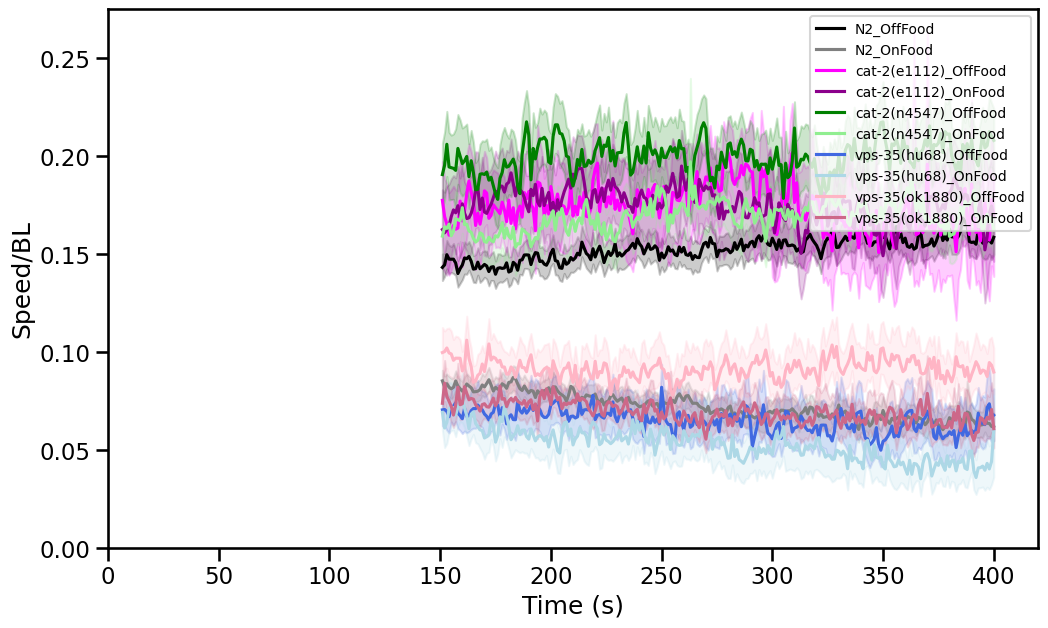

In [44]:
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="Speed/BL", 
             data = chunkeddata,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        '#FF00FF',
                        '#8B008B',
                        'green',
                        'lightgreen',
                        'royalblue',
                        'lightblue',
                        '#FFB5C5',
                        '#CD6889'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
# plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

In [82]:
# print(chunkeddata)
platemean_data=chunkeddata.groupby(["Strain","date", "plate_id"], as_index=False).mean()
platemean_data[['Genotype', 'Treatment']] = platemean_data['Strain'].str.split('_',expand=True)
print(platemean_data)
platemean_data=platemean_data[platemean_data['Strain'].isin(['N2_OffFood', 'N2_OnFood',
                          'vps-35(hu68)_OffFood','vps-35(hu68)_OnFood',
                          'vps-35(ok1880)_OffFood','vps-35(ok1880)_OnFood',
                                  'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood'])]

                    Strain      date  plate_id    time_bin        worm  \
0               N2_OffFood  20220609    111617  271.092391  197.992342   
1               N2_OffFood  20220609    123528  246.660524  639.604205   
2               N2_OffFood  20220609    133939  271.033416  721.308956   
3               N2_OffFood  20220609    135619  276.676475  301.674176   
4               N2_OffFood  20220818    113228  274.485868  402.478331   
5               N2_OffFood  20220818    125231  272.982790  547.502544   
6               N2_OffFood  20220818    125942  269.759263  463.194251   
7               N2_OffFood  20230331    130455  270.707871  137.158906   
8               N2_OffFood  20230331    135724  272.360484   32.556290   
9               N2_OffFood  20230331    140510  268.767400   91.770471   
10              N2_OffFood  20230331    143633  270.968850  767.120708   
11               N2_OnFood  20220609    122507  273.887529  231.037796   
12               N2_OnFood  20220609  

<Figure size 640x480 with 0 Axes>

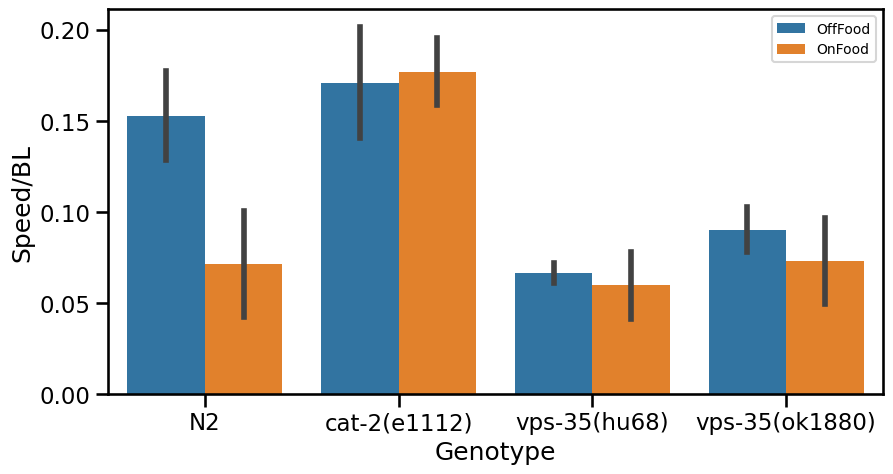

In [88]:
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(10,5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y="Speed/BL", 
             data = platemean_data,
             hue = 'Treatment',
             errorbar="sd"
             # palette = ['black',
             #            'grey',
             #            '#FF00FF',
             #            '#8B008B',
             #            'green',
             #            'lightgreen',
             #            'royalblue',
             #            'lightblue',
             #            '#FFB5C5',
             #            '#CD6889']
                       )
plt.xlabel("Genotype")
plt.ylabel("Speed/BL")
# plt.title("Speed Trace")
# plt.ylim(top = top)
# plt.ylim(bottom = bottom)
# plt.xlim(left= left)
# plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
plt.savefig('/Users/Joseph/Desktop/VPS35/VPS35.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

<Axes: xlabel='Genotype', ylabel='Speed/BL'>

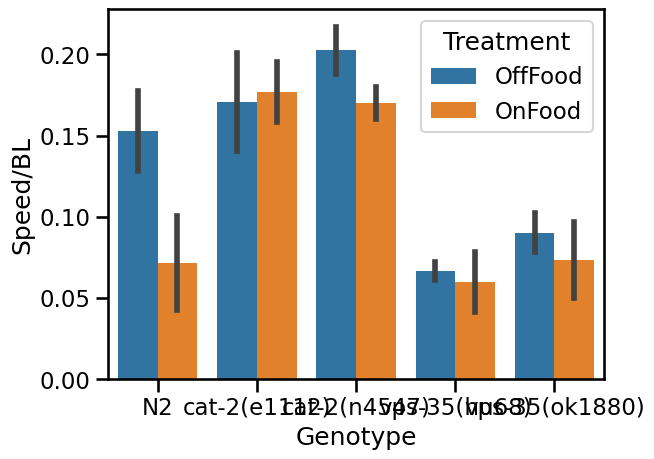

In [78]:
sns.barplot(data=platemean_data, x="Genotype", y="Speed/BL", hue="Treatment", errorbar="sd")